# Data Analysis

In this interactive notebook, we perform analysis on the data that we merged in the [previous notebook](data-merging.ipynb). Here, we aim to perform some analysis on the merged and cleaned data, producing some visualizations and important statistical information to help us answer some of the questions outlined in the [ReadMe](README.md).

----

Let's start by importing the required libraries. Note that custom functions are stored in the file [`analytics_tools.py`](analytics_tools.py), which we will need to import.

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_context('talk')

In [105]:
%matplotlib inline

In [106]:
final_data = pd.read_pickle('cleaned_data/final_data_merged.pkl')

In [107]:
final_data.head()

,imdb_id,primary_title,original_title,start_year,genres,directors,writers,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross
20,tt0249516,Foodfight!,Foodfight!,2012,"[Action, Animation, Comedy]",[nm0440415],"[nm0440415, nm0923312, nm0295165, nm0841854, n...",1.9,8248.0,2012-12-31,45000000.0,0.0,7.370600e+04
48,tt0337692,On the Road,On the Road,2012,"[Adventure, Drama, Romance]",[nm0758574],"[nm0449616, nm1433580]",6.1,37886.0,2013-03-22,25000000.0,720828.0,9.313302e+06
54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,"[Adventure, Comedy, Drama]",[nm0001774],"[nm0175726, nm0862122]",7.3,275300.0,2013-12-25,91000000.0,58236838.0,1.878612e+08
58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,"[Action, Crime, Drama]",[nm0291082],"[nm0088747, nm0291082]",6.5,105116.0,2014-09-19,28000000.0,26017685.0,6.210859e+07
60,tt0369610,Jurassic World,Jurassic World,2015,"[Action, Adventure, Sci-Fi]",[nm1119880],"[nm0415425, nm0798646, nm1119880, nm2081046, n...",7.0,539338.0,2015-06-12,215000000.0,652270625.0,1.648855e+09


In [108]:
final_data['ROI'] = ((final_data['worldwide_gross']
                      - final_data['production_budget'])
                     / final_data['production_budget']) * 100

In [109]:
final_data.head(10)

,imdb_id,primary_title,original_title,start_year,genres,directors,writers,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,ROI
20,tt0249516,Foodfight!,Foodfight!,2012,"[Action, Animation, Comedy]",[nm0440415],"[nm0440415, nm0923312, nm0295165, nm0841854, n...",1.9,8248.0,2012-12-31,45000000.0,0.0,7.370600e+04,-99.836209
48,tt0337692,On the Road,On the Road,2012,"[Adventure, Drama, Romance]",[nm0758574],"[nm0449616, nm1433580]",6.1,37886.0,2013-03-22,25000000.0,720828.0,9.313302e+06,-62.746792
54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,"[Adventure, Comedy, Drama]",[nm0001774],"[nm0175726, nm0862122]",7.3,275300.0,2013-12-25,91000000.0,58236838.0,1.878612e+08,106.440860
58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,"[Action, Crime, Drama]",[nm0291082],"[nm0088747, nm0291082]",6.5,105116.0,2014-09-19,28000000.0,26017685.0,6.210859e+07,121.816382
60,tt0369610,Jurassic World,Jurassic World,2015,"[Action, Adventure, Sci-Fi]",[nm1119880],"[nm0415425, nm0798646, nm1119880, nm2081046, n...",7.0,539338.0,2015-06-12,215000000.0,652270625.0,1.648855e+09,666.909239
62,tt0376136,The Rum Diary,The Rum Diary,2011,"[Comedy, Drama]",[nm0732430],"[nm0732430, nm0860219]",6.2,94787.0,2011-10-28,45000000.0,13109815.0,2.154473e+07,-52.122818
67,tt0383010,The Three Stooges,The Three Stooges,2012,"[Comedy, Family]","[nm0268380, nm0268370]","[nm0148808, nm0268370, nm0268380]",5.1,28570.0,2012-04-13,30000000.0,44338224.0,5.405225e+07,80.174163
69,tt0393049,Anderson's Cross,Anderson's Cross,2010,"[Comedy, Drama, Romance]",[nm1516329],[nm1516329],5.5,106.0,2010-12-31,300000.0,0.0,0.000000e+00,-100.000000
71,tt0398286,Tangled,Tangled,2010,"[Adventure, Animation, Comedy]","[nm1977355, nm0397174]","[nm1557594, nm0342278, nm0342303]",7.8,366366.0,2010-11-24,260000000.0,200821936.0,5.864772e+08,125.568169
73,tt0401729,John Carter,John Carter,2012,"[Action, Adventure, Sci-Fi]",[nm0004056],"[nm0004056, nm0028764, nm0149290, nm0123194]",6.6,241792.0,2012-03-09,275000000.0,73058679.0,2.827781e+08,2.828400


Somehow, we need to best make use of our genre descriptors. We currently have lists of strings, and it would be nice to produce some sort of histogram using this information. Let's try flattening out our genre descriptions into dummy variables. We have to do a bit of additional processing to make the input suitable for Pandas's `get_dummies` function.

In [110]:
genre_dummies = pd.get_dummies(final_data.genres.apply(pd.Series).stack()).sum(level=0)

In [111]:
genre_dummies.columns

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western'],
      dtype='object')

In [112]:
num_subplots = len(genre_dummies.columns)
num_subplots

21

In [113]:
final_with_genre_dummies = final_data.join(genre_dummies, how='outer')

In [114]:
correl_table = final_data.corr()
correl_table

,start_year,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,ROI
start_year,1.000000,0.048592,-0.043684,0.102462,0.104921,0.115488,0.031860
averagerating,0.048592,1.000000,0.464911,0.209422,0.287181,0.270930,0.026794
numvotes,-0.043684,0.464911,1.000000,0.554988,0.653605,0.642382,0.089905
production_budget,0.102462,0.209422,0.554988,1.000000,0.724452,0.792679,-0.020642
domestic_gross,0.104921,0.287181,0.653605,0.724452,1.000000,0.947475,0.120453
worldwide_gross,0.115488,0.270930,0.642382,0.792679,0.947475,1.000000,0.103602
ROI,0.031860,0.026794,0.089905,-0.020642,0.120453,0.103602,1.000000


In [115]:
correl_with_dummies = final_with_genre_dummies.corr()
correl_with_dummies.loc['Action':'Western', 'ROI'].nlargest(10)

Mystery      0.149433
Horror       0.143449
Thriller     0.085869
Romance      0.004900
Animation    0.002419
Sport       -0.001042
Music       -0.002574
Sci-Fi      -0.007390
Biography   -0.007580
Musical     -0.012171
Name: ROI, dtype: float64

In [125]:
# final_data[genre_dummies.War == 1].mean()['ROI']

//anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


33.9793059549673

In [ ]:
for genre in genre_dummies.columns:
    cur_subset = final_data[genre_dummies[genre] == 1]
    mean_roi = cur_subset.mean()['ROI']

//anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 0.98, 'ROI over Time by Genre')

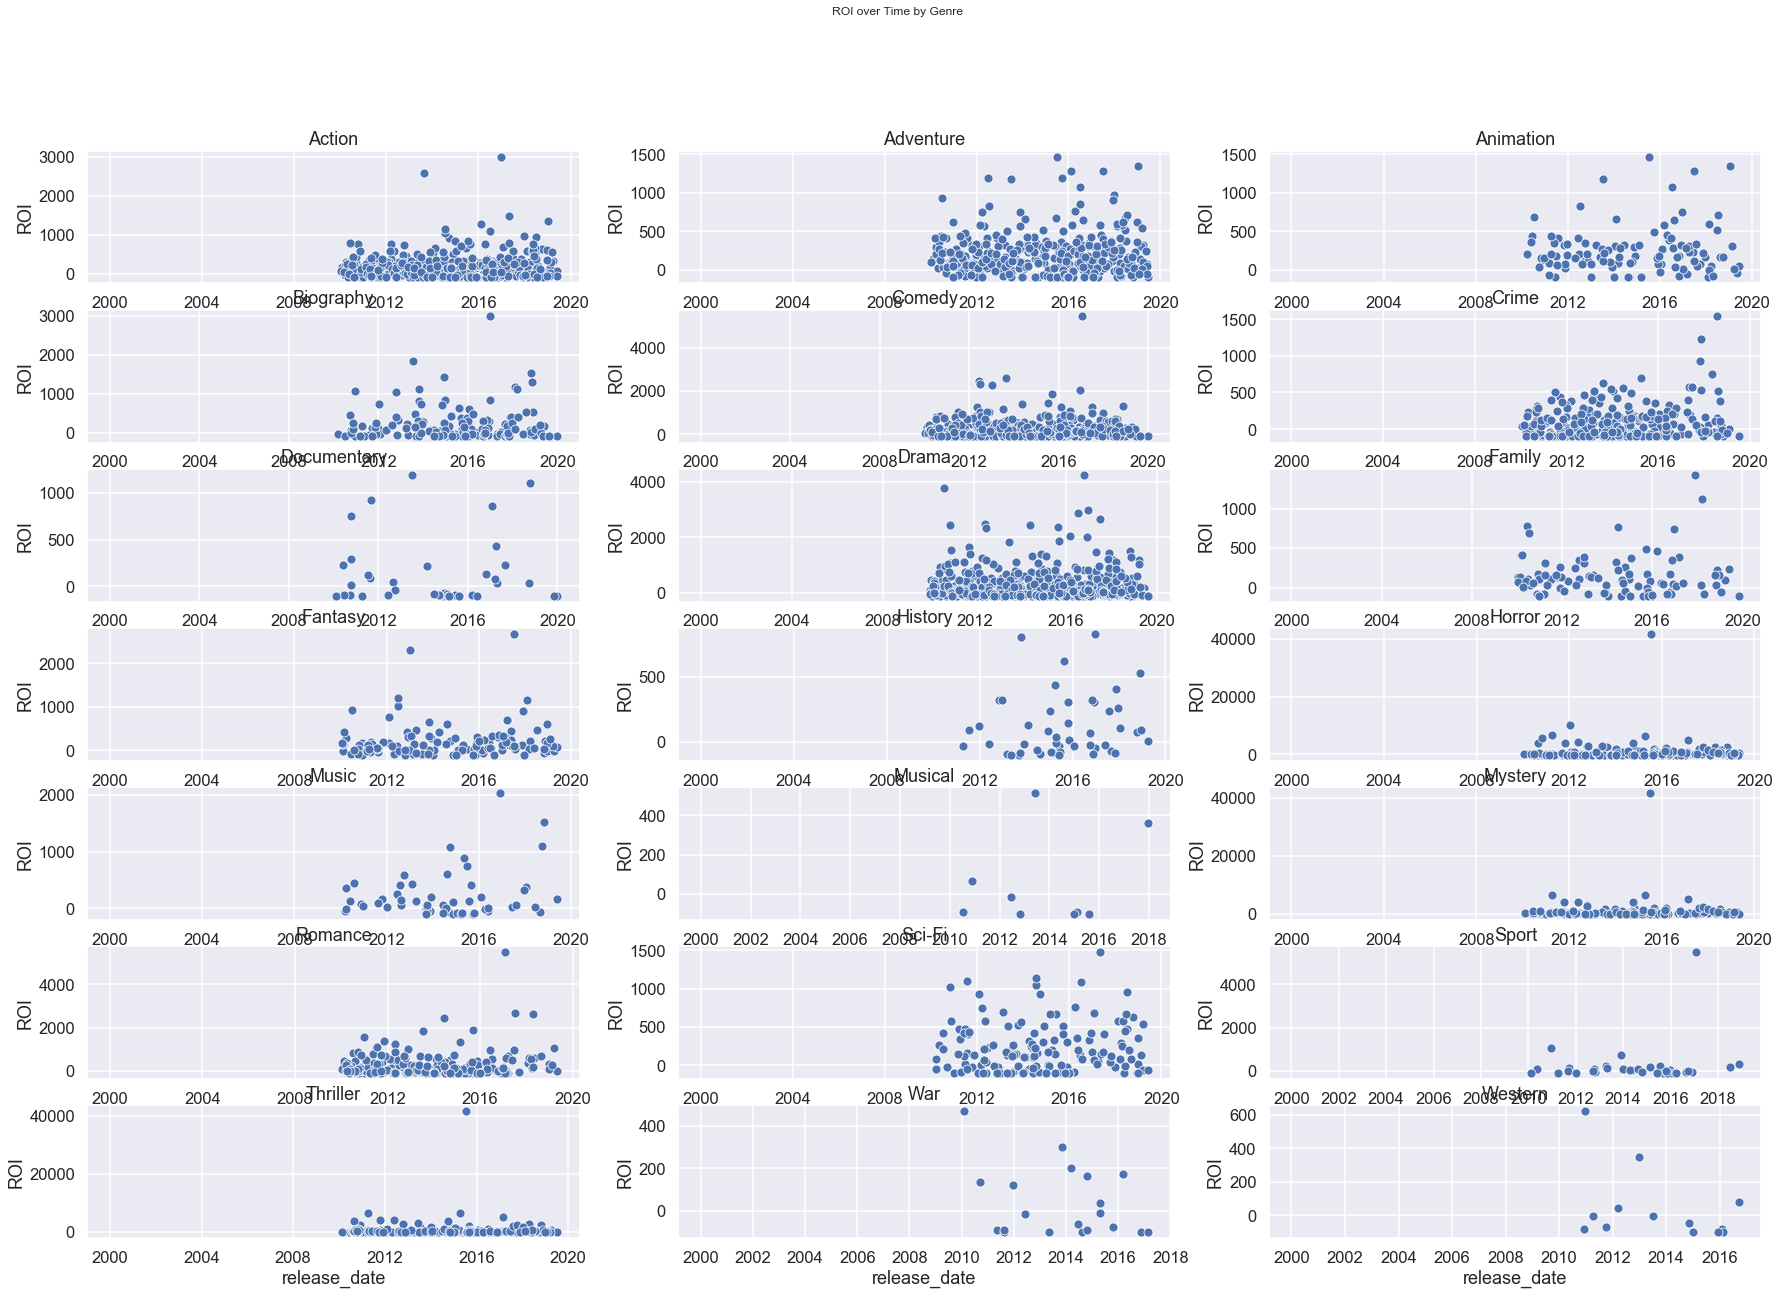

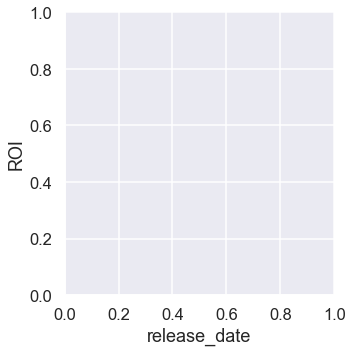

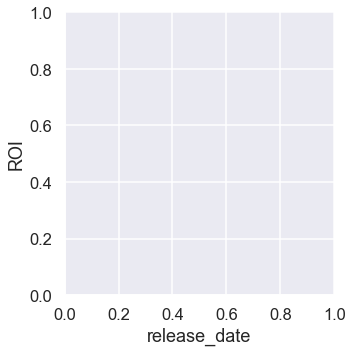

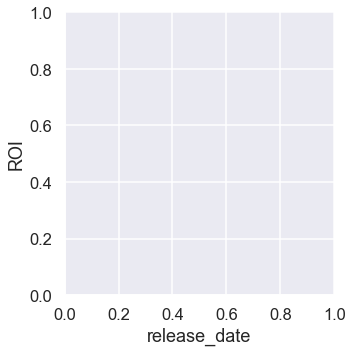

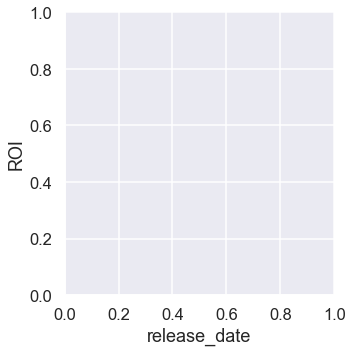

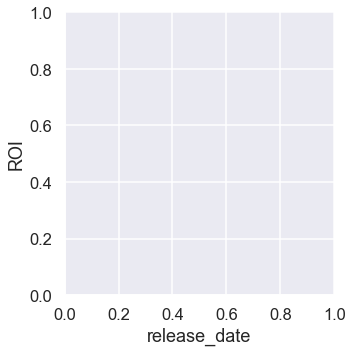

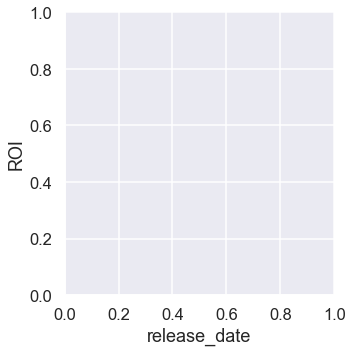

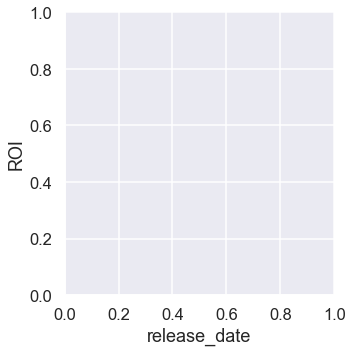

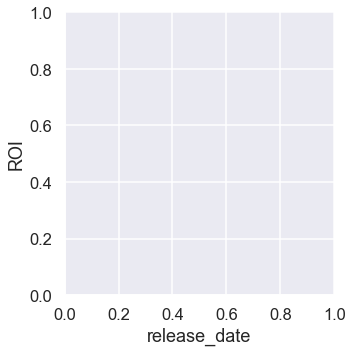

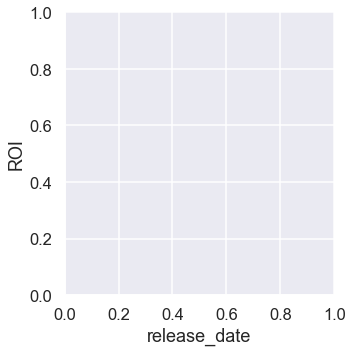

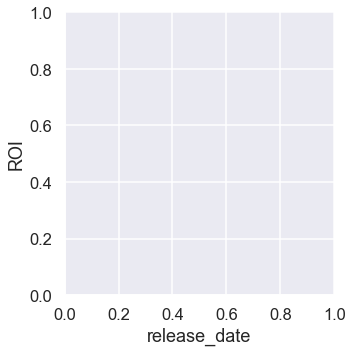

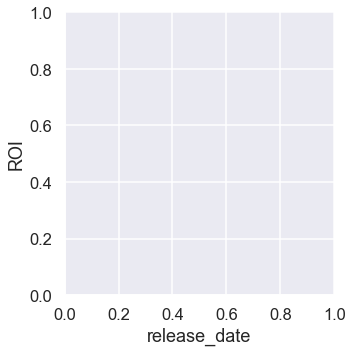

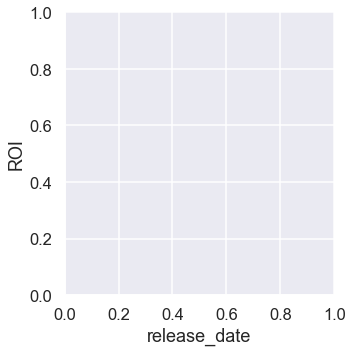

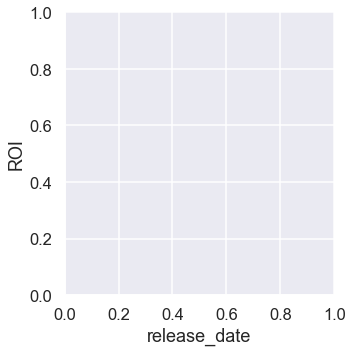

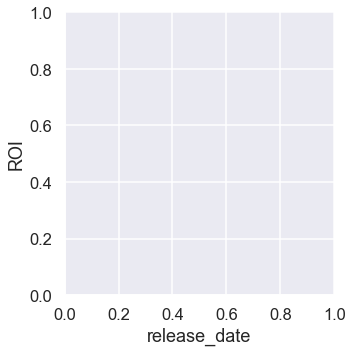

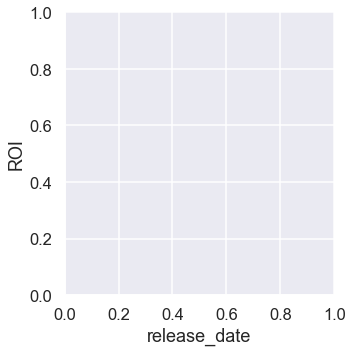

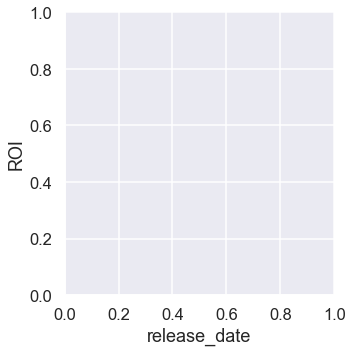

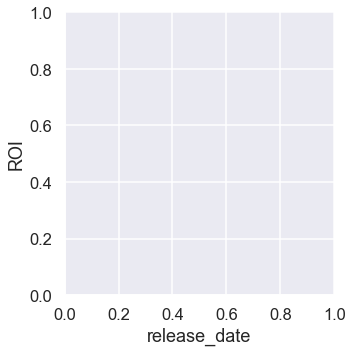

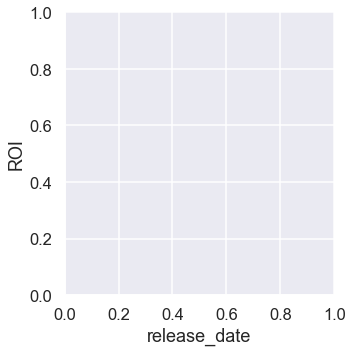

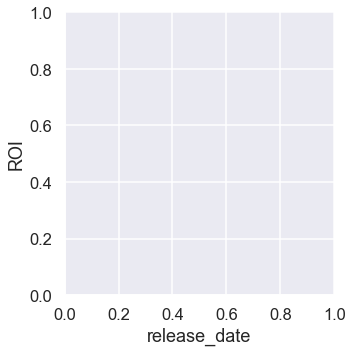

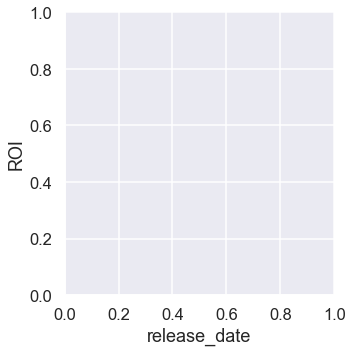

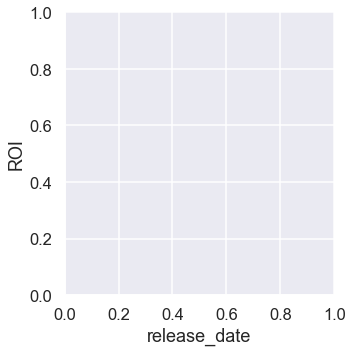

In [139]:
rows = 7
cols = 3
genre_subset_f, genre_subset_ax = plt.subplots(nrows=rows, ncols=cols, figsize=(30, 20))

for i in range(num_subplots):
    genre = genre_dummies.columns[i]
    row = i // cols
    col = i % cols
    cur_ax = genre_subset_ax[row, col]
    cur_subset = final_data[genre_dummies[genre] == 1]
    sns.relplot(x='release_date', y='ROI', data=cur_subset, ax=cur_ax)
    cur_ax.set_title(genre)

In [62]:
director_dummies = pd.get_dummies(final_data.directors.apply(pd.Series).stack()).sum(level=0)

In [140]:
director_dummies.head()

,nm0000095,nm0000108,nm0000110,nm0000123,nm0000127,nm0000128,nm0000142,nm0000149,nm0000154,nm0000158,...,nm6405547,nm6425161,nm6630093,nm6735778,nm6773153,nm7247688,nm7249446,nm8083973,nm8190487,nm9124087
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
writers_dummies = pd.get_dummies(final_data.writers.apply(pd.Series).stack()).sum(level=0)

In [141]:
writers_dummies.head()

,nm0000041,nm0000092,nm0000095,nm0000101,nm0000108,nm0000116,nm0000118,nm0000123,nm0000127,nm0000158,...,nm9195200,nm9204083,nm9204084,nm9204085,nm9259302,nm9351707,nm9592688,nm9610722,nm9634718,nm9984296
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
final_data['release_year'] = final_data.release_date.dt.year
final_data['release_month'] = final_data.release_date.dt.month
final_data['release_weekofyear'] = final_data.release_date.dt.weekofyear

In [164]:
final_data.groupby('release_year').describe()

start_year                                                  \
                  count         mean       std     min      25%     50%   
release_year                                                              
2010              175.0  2010.085714  0.650880  2010.0  2010.00  2010.0   
2011              201.0  2010.860697  0.361244  2010.0  2011.00  2011.0   
2012              197.0  2011.873096  0.856629  2010.0  2012.00  2012.0   
2013              197.0  2012.730964  0.737969  2010.0  2013.00  2013.0   
2014              213.0  2013.713615  0.775602  2010.0  2014.00  2014.0   
2015              255.0  2014.313725  1.281150  2010.0  2014.00  2015.0   
2016              179.0  2015.530726  1.172199  2010.0  2016.00  2016.0   
2017              132.0  2016.348485  1.620408  2010.0  2016.00  2017.0   
2018              119.0  2017.453782  1.640318  2010.0  2018.00  2018.0   
2019               42.0  2017.333333  2.902200  2010.0  2017.25  2019.0   

                             averagerating            ... release_month        \
                 75%     max         count      mean  ...           75%   max   
release_year                                          ...                       
2010          2010.0  2017.0         175.0  6.194857  ...          10.0  12.0   
2011          2011.0  2012.0         201.0  6.294030  ...          10.0  12.0   
2012          2012.0  2019.0         197.0  6.216751  ...          10.0  12.0   
2013          2013.0  2015.0         197.0  6.201523  ...          10.0  12.0   
2014          2014.0  2017.0         213.0  6.355869  ...          10.0  12.0   
2015          2015.0  2017.0         255.0  5.916863  ...          10.0  12.0   
2016          2016.0  2017.0         179.0  6.310615  ...          10.0  12.0   
2017          2017.0  2019.0         132.0  6.337121  ...          10.0  12.0   
2018          2018.0  2019.0         119.0  6.311765  ...          10.0  12.0   
2019          2019.0  2019.0          42.0  6.323810  ...           5.0  12.0   

             release_weekofyear                                                \
                          count       mean        std  min    25%   50%   75%   
release_year                                                                    
2010                      175.0  30.034286  14.821892  1.0  17.00  32.0  41.5   
2011                      201.0  28.960199  14.454702  1.0  16.00  31.0  41.0   
2012                      197.0  25.898477  15.169446  1.0  13.00  26.0  39.0   
2013                      197.0  25.446701  15.601656  1.0  12.00  26.0  39.0   
2014                      213.0  26.699531  15.772673  1.0  13.00  28.0  41.0   
2015                      255.0  28.819608  15.800641  2.0  14.50  30.0  43.0   
2016                      179.0  27.083799  15.656019  1.0  12.50  27.0  41.0   
2017                      132.0  26.636364  15.448646  1.0  13.00  26.5  41.0   
2018                      119.0  27.663866  15.682376  1.0  13.00  28.0  41.0   
2019                       42.0  14.333333   9.364350  1.0   6.25  13.5  20.5   

                    
               max  
release_year        
2010          52.0  
2011          52.0  
2012          52.0  
2013          52.0  
2014          52.0  
2015          53.0  
2016          52.0  
2017          52.0  
2018          52.0  
2019          45.0  

[10 rows x 72 columns]

//anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


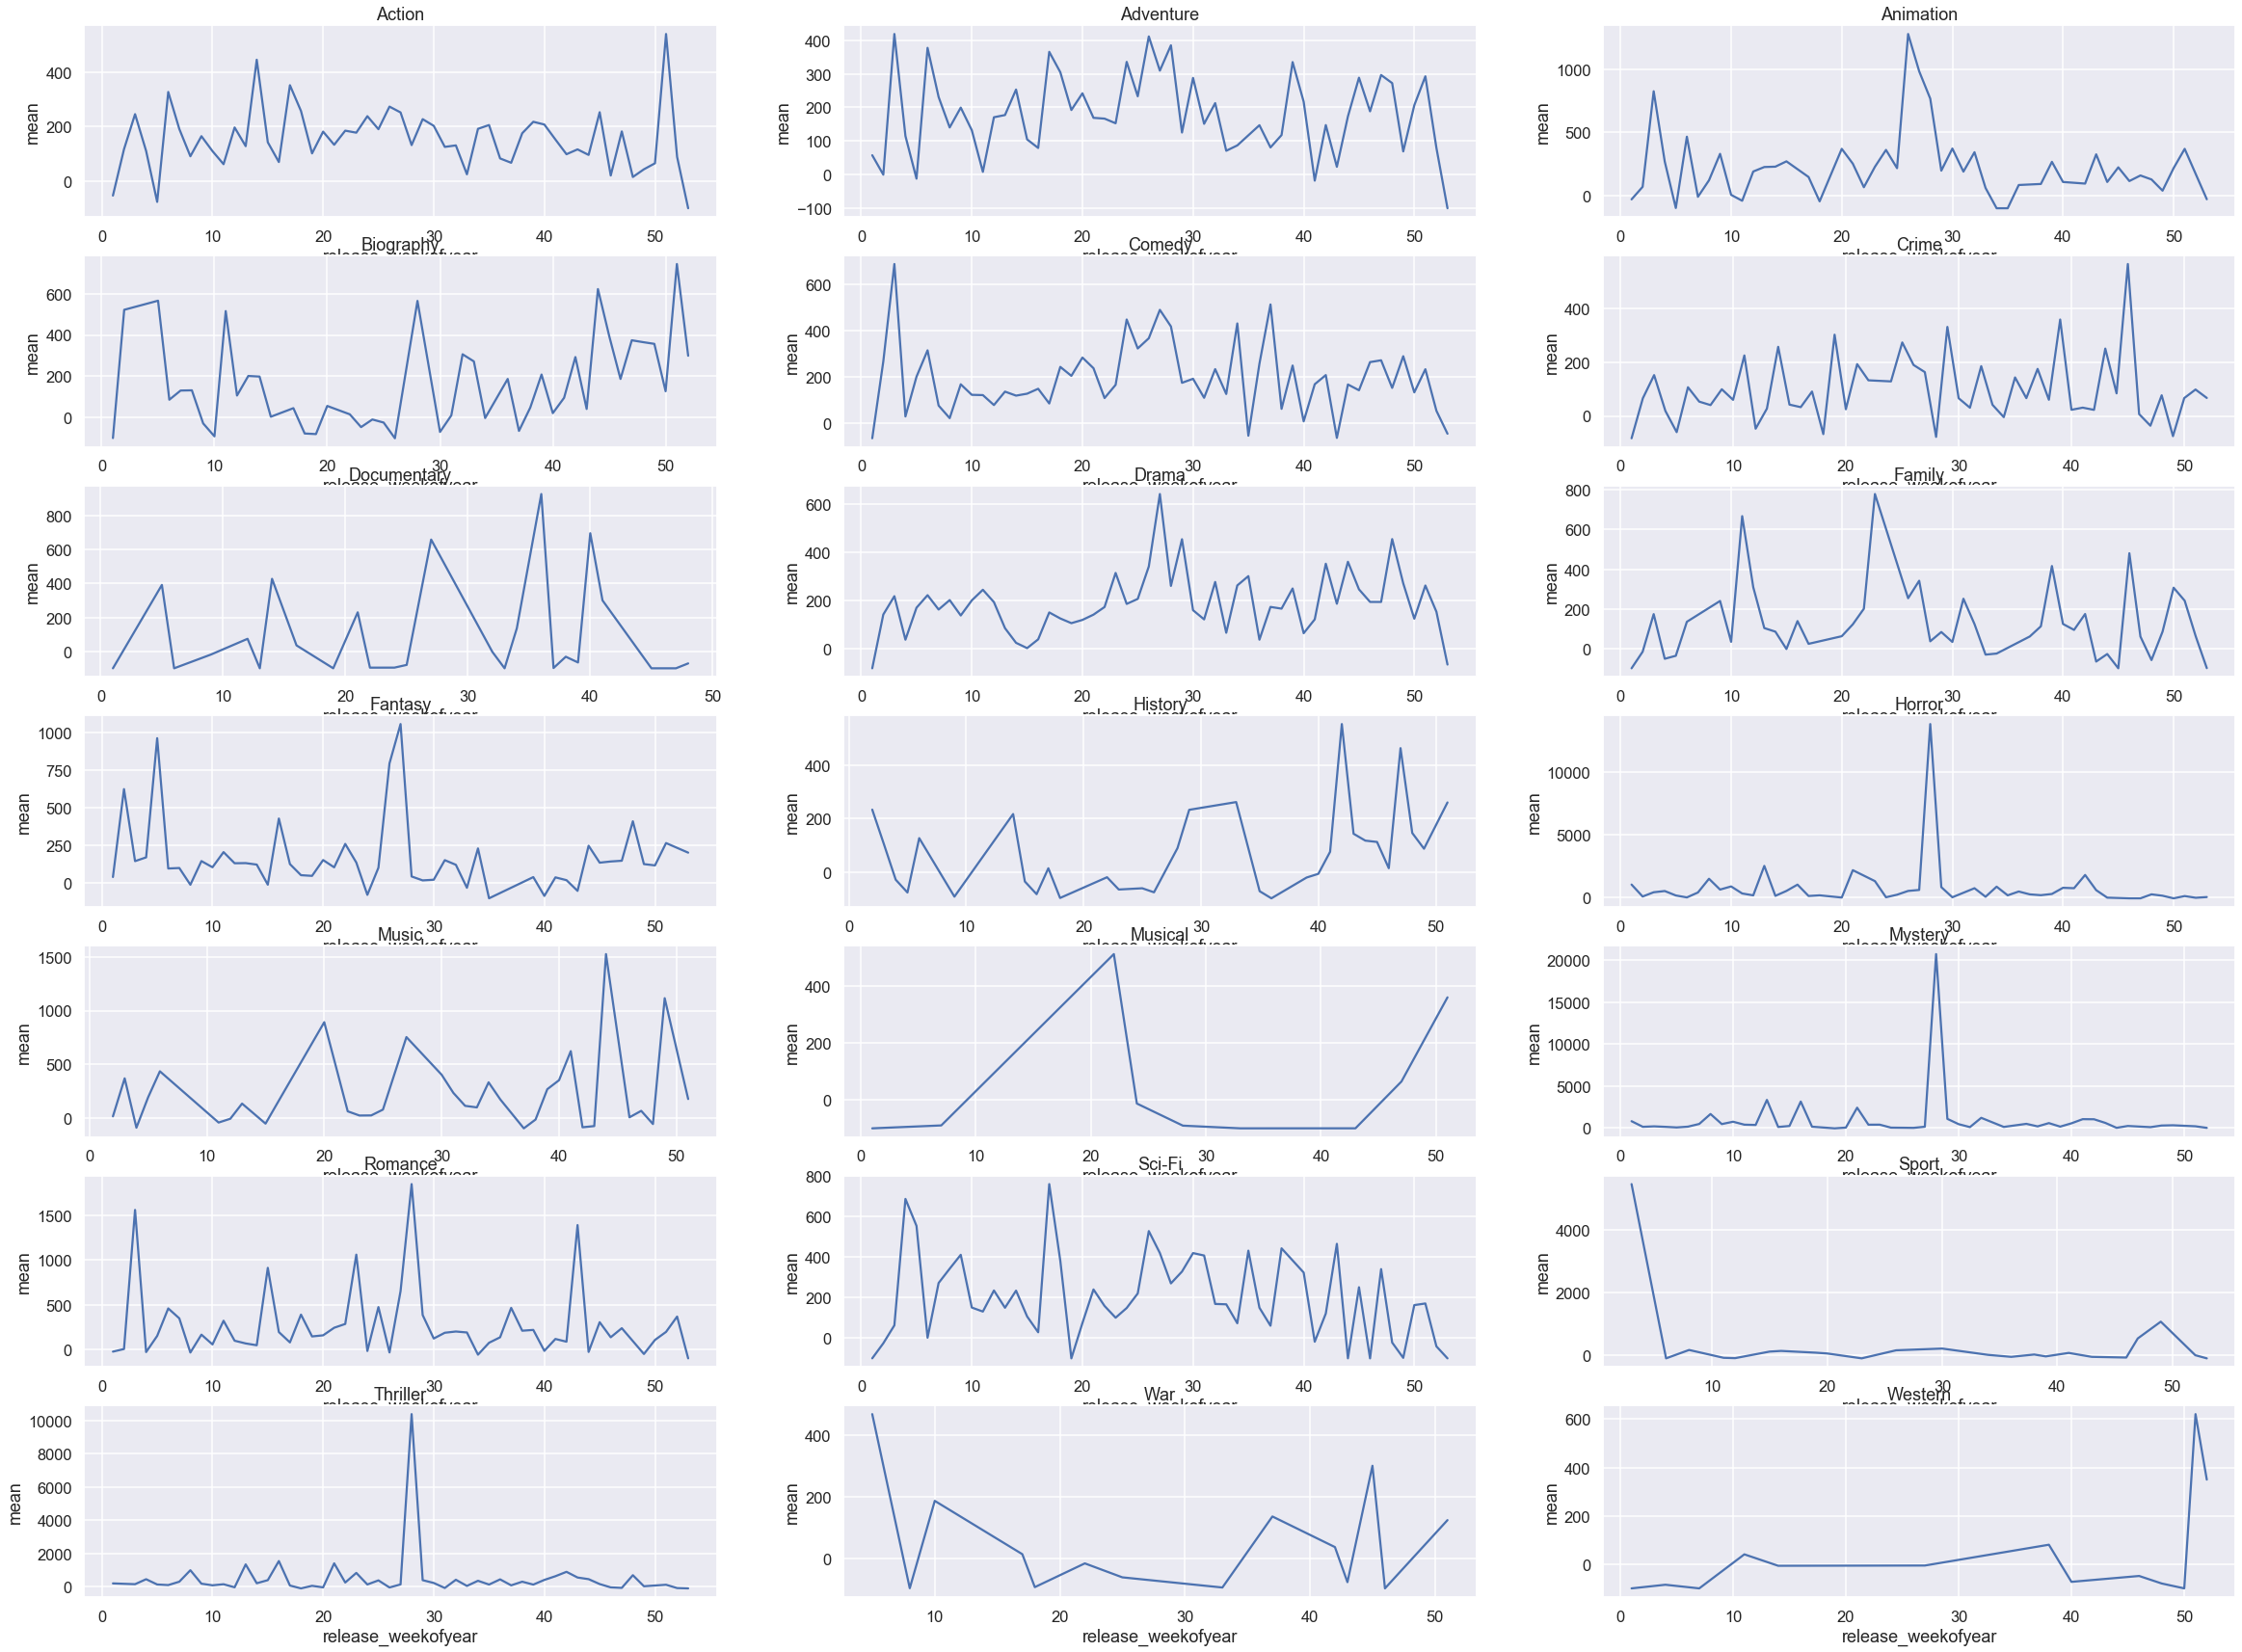

In [165]:
rows = 7
cols = 3
genre_subset_f2, genre_subset_ax2 = plt.subplots(nrows=rows, ncols=cols, figsize=(40, 30))

for i in range(num_subplots):
    genre = genre_dummies.columns[i]
    row = i // cols
    col = i % cols
    cur_ax = genre_subset_ax2[row, col]
    cur_subset = final_data[genre_dummies[genre] == 1]
    grouped = cur_subset.groupby('release_weekofyear').describe()['ROI'].reset_index()
    sns.lineplot(x='release_weekofyear', y='mean', data=grouped, ax=cur_ax)
    cur_ax.set_title(genre)